The [translate:Pose model from MediaPipe] is designed to detect human poses by identifying 33 key points on the body, enabling it to accurately determine the positions of different body parts. This model employs a two-stage detection architecture that first locates the general pose region and then performs precise estimation of each key point's position. It is optimized for real-time performance and efficiency, making it suitable for mobile and edge devices.


 [YOLOv7 Pose vs MediaPipe](https://www.youtube.com/watch?v=hCJIU0pOl5g&t=373s)

Installing the necessary libraries

In [ ]:
!pip uninstall -y protobuf
!pip install protobuf==5.26.1

Found existing installation: protobuf 4.25.8
Uninstalling protobuf-4.25.8:
  Successfully uninstalled protobuf-4.25.8
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 8.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.14 requires protobuf<5,>=4.25.3, but you have protobuf 5.26.1 which is incompatible.
tensorflow-decision-forests 1.12.0 requires ydf>=0.11.0, but you have ydf 0.9.0 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


In [ ]:
!pip install -U protobuf google-colab ydf mediapipe

import mediapipe as mp
import time

  Using cached protobuf-6.33.0-cp39-abi3-manylinux2014_x86_64.whl.metadata (593 bytes)
  Using cached ydf-0.13.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.6 kB)
  Using cached mediapipe-0.10.21-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
INFO: pip is looking at multiple versions of mediapipe to determine which version is compatible with other requirements. This could take a while.
  Using cached mediapipe-0.10.20-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
  Using cached mediapipe-0.10.18-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.7 kB)
  Using cached mediapipe-0.10.15-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.7 kB)
  Using cached mediapipe-0.10.14-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.7 kB)
  Using cached mediapipe-0.10.13-cp312-cp312-manylin

KeyboardInterrupt: 

Photo processing:


/usr/local/lib/python3.12/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.7.2 is installed, but it is not compatible with the installed jaxlib version 0.7.1, so it will not be used.
  warnings.warn(


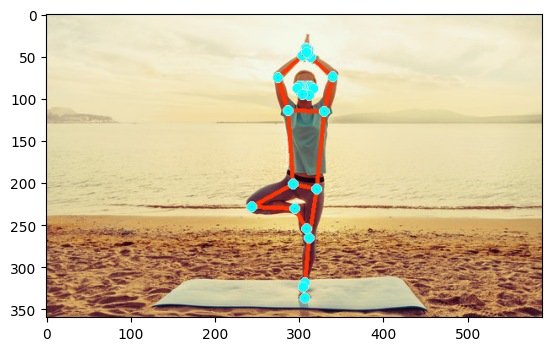

In [ ]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

# Initialize MediaPipe Pose with high model complexity for better accuracy
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(model_complexity=2)  # 2 = highest complexity, 1 = medium, 0 = low

# Load the input image from file
image_path = 'your.jpg'
image = cv2.imread(image_path)
height, width, _ = image.shape

# Convert image from BGR (OpenCV default) to RGB (MediaPipe requirement)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# MediaPipe processing requires the image to be write-protected for better performance
image.flags.writeable = False

# Process the image through MediaPipe Pose model
# This detects 33 pose landmarks (nose, shoulders, elbows, wrists, hips, knees, ankles, etc.)
results = pose.process(image)

# Make image writeable again for drawing landmarks
image.flags.writeable = True

# Convert back to BGR for OpenCV operations
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Draw the pose landmarks and connections on the image
mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,  # Contains the 33 detected landmarks
        mp_pose.POSE_CONNECTIONS,  # Pre-defined connections between landmarks (skeleton)
        mp_drawing.DrawingSpec(   # Styling for the landmarks (points)
          color=(255,255,0),     # Yellow color (BGR format)
          thickness=3,           # Thickness of landmark circles
          circle_radius=3        # Radius of landmark circles
        ),
        mp_drawing.DrawingSpec(  # Styling for the connections (lines)
          color=(0,50,255),     # Reddish color (BGR format)
          thickness=4,          # Thickness of connection lines
          circle_radius=2       # Not used for connections
        )
    )

# Convert back to RGB for matplotlib display
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the processed image with pose landmarks using matplotlib
plt.imshow(image)  # Show image with detected pose landmarks and connections
plt.show()  # Render the plot window

Video processing:

Starting video processing m.mp4...
Video information:
 - Resolution: 720x1280
 - FPS: 24.00
 - Total frames: 295
 - Duration: 12.29 seconds
Result will be saved to: m_pose_detected.mp4

Processing video...
Processed: 50/295 frames (16.9%)
Processed: 100/295 frames (33.9%)
Processed: 150/295 frames (50.8%)
Processed: 200/295 frames (67.8%)
Processed: 250/295 frames (84.7%)

Examples of processed frames:
Frame 1


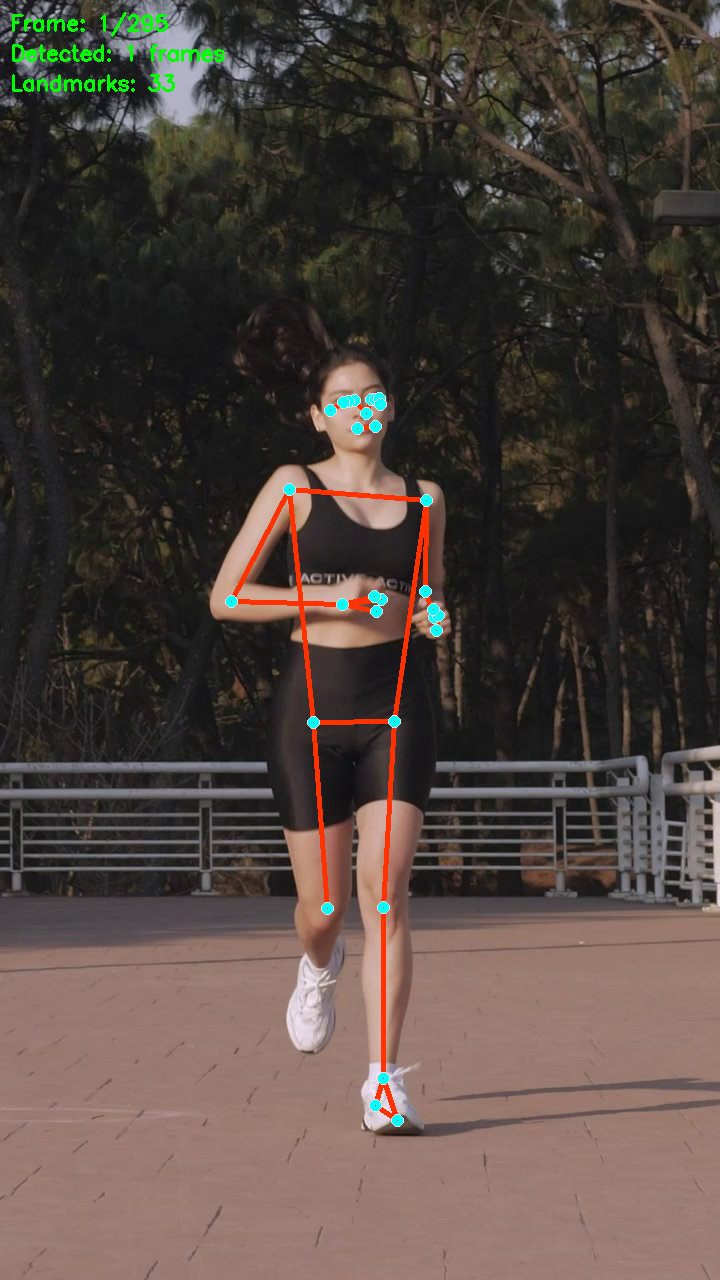

Frame 59


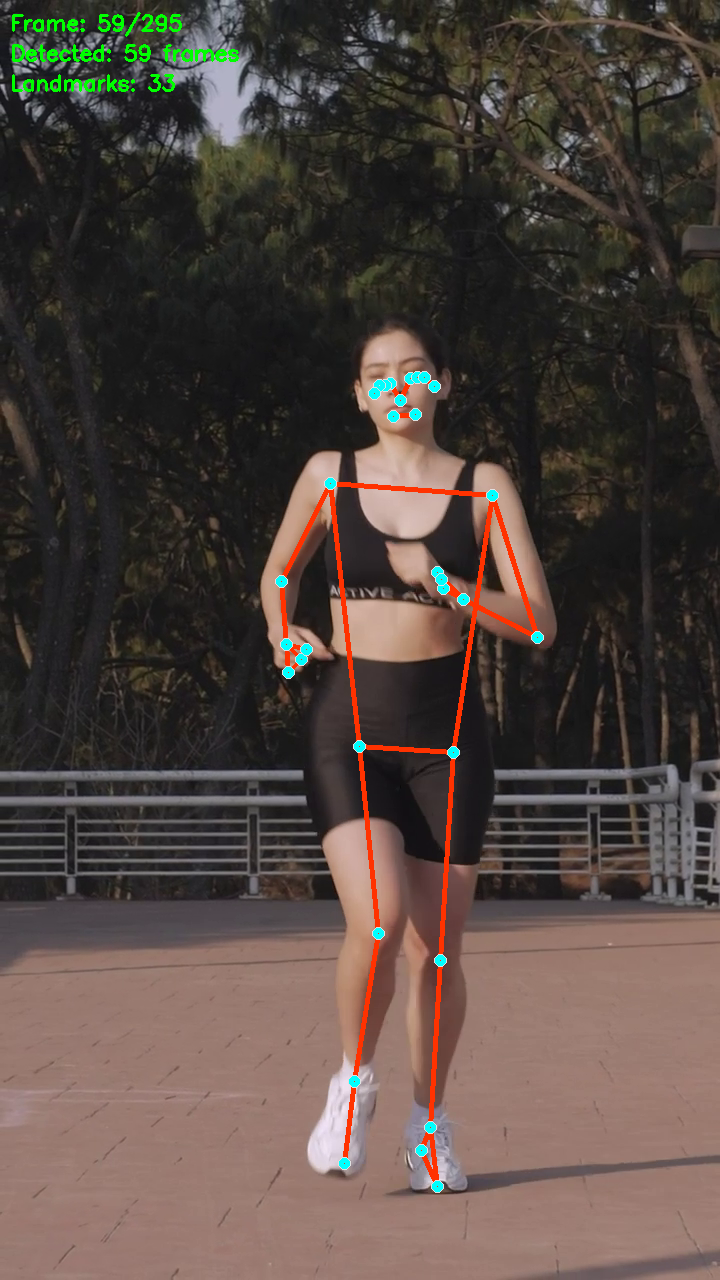

Frame 118


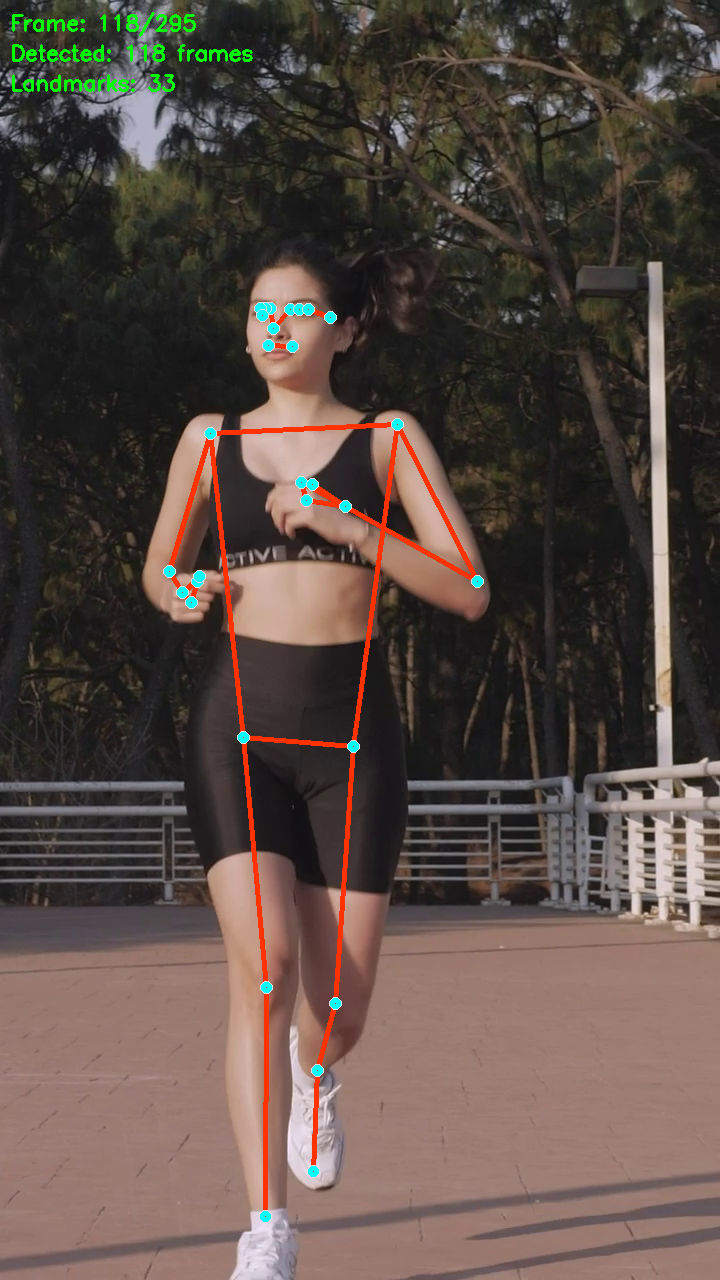

Frame 177


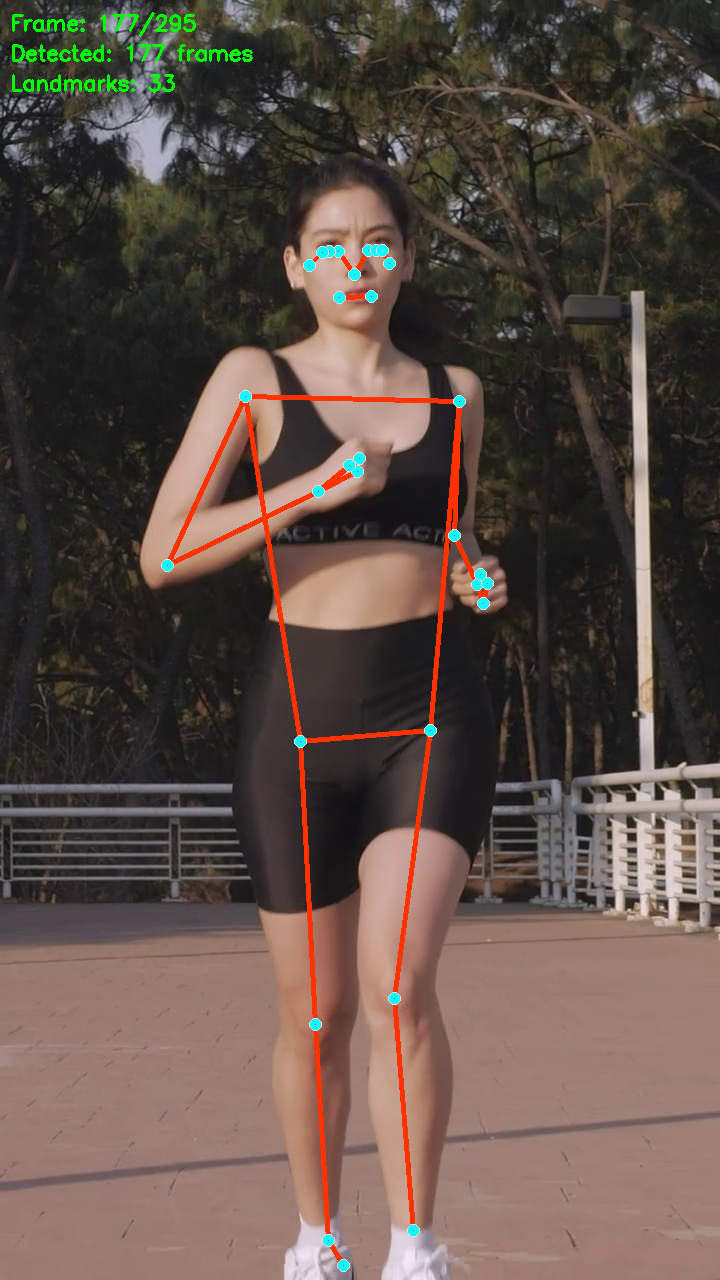

Frame 236


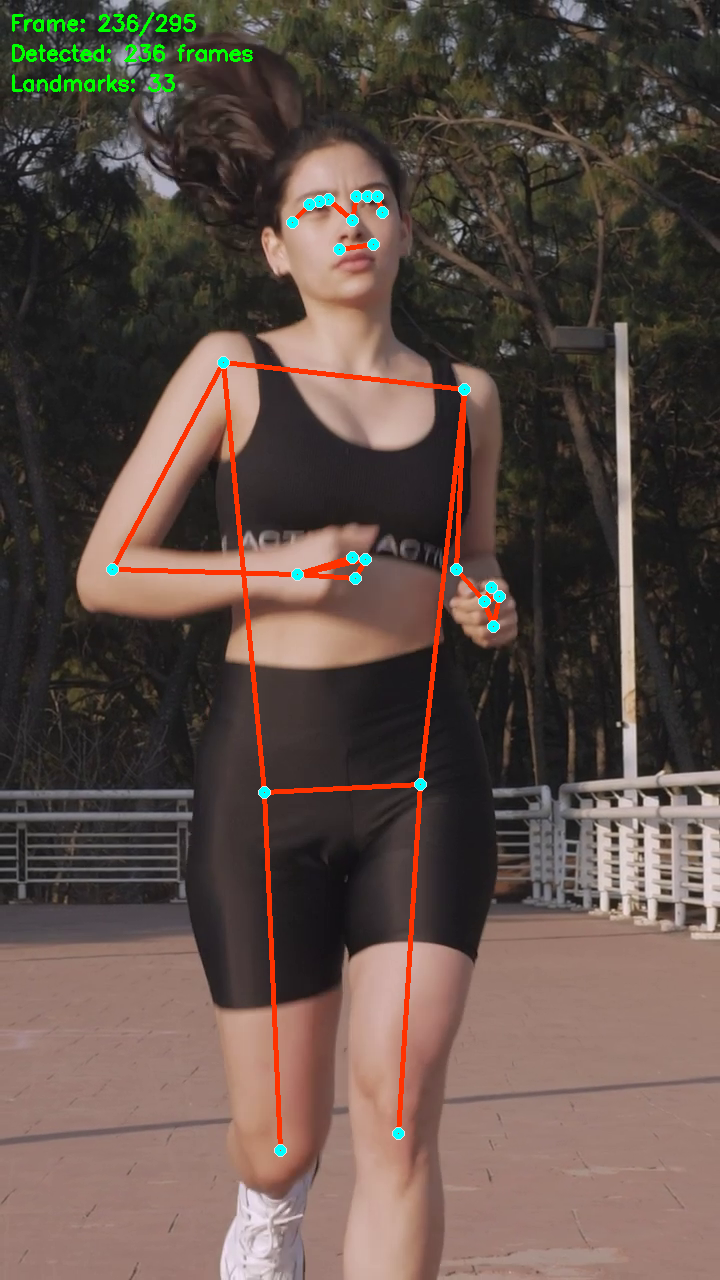

Frame 295


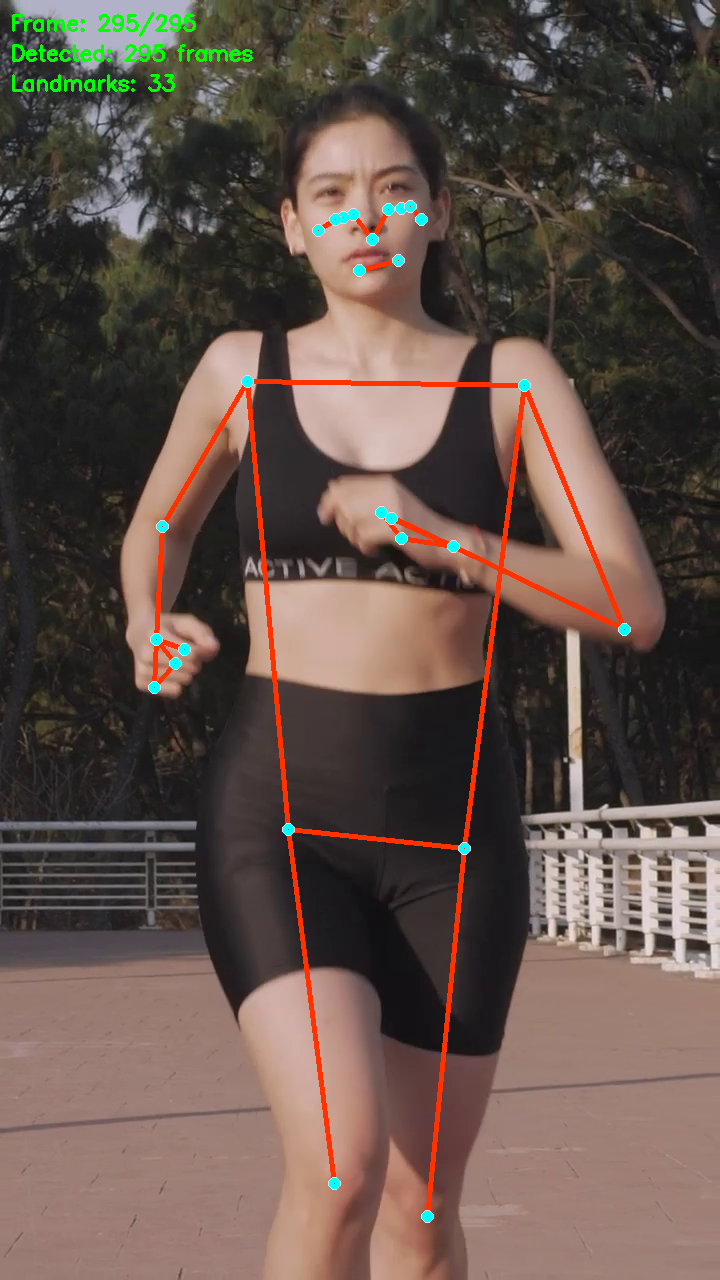


Processing completed!
Frames processed: 295
Poses detected: 295
Detection rate: 100.0%
Result saved to: m_pose_detected.mp4
Output file size: 11.04 MB
To download result use:
files.download('m_pose_detected.mp4')


In [8]:
import mediapipe as mp
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
from IPython.display import display, HTML
import base64
from google.colab import files

# Initialize MediaPipe Pose components
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

def process_video(input_path, output_path=None):
    """
    Process video with human pose detection in Google Colab

    Args:
        input_path (str): Path to input video file
        output_path (str, optional): Path to save processed video
    """
    # Check if input file exists
    if not os.path.exists(input_path):
        print(f"Error: File {input_path} not found!")
        return

    # Initialize Pose model with settings
    pose = mp_pose.Pose(
        model_complexity=2,  # High accuracy
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5
    )

    # Capture video
    cap = cv2.VideoCapture(input_path)

    # Check if video opened successfully
    if not cap.isOpened():
        print(f"Error: Could not open video file {input_path}")
        return

    # Get video parameters
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print(f"Video information:")
    print(f" - Resolution: {frame_width}x{frame_height}")
    print(f" - FPS: {fps:.2f}")
    print(f" - Total frames: {total_frames}")
    print(f" - Duration: {total_frames/fps:.2f} seconds")

    # Create VideoWriter for saving result
    if output_path:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))
        print(f"Result will be saved to: {output_path}")

    print("\nProcessing video...")

    frame_count = 0
    detection_count = 0
    sample_frames = []  # For saving sample frames

    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        frame_count += 1

        # Convert BGR to RGB
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image_rgb.flags.writeable = False

        # Process frame with MediaPipe
        results = pose.process(image_rgb)

        # Make image writeable again and convert back to BGR
        image_rgb.flags.writeable = True
        image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

        # Draw pose landmarks if detected
        if results.pose_landmarks:
            detection_count += 1
            mp_drawing.draw_landmarks(
                image_bgr,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(255, 255, 0), thickness=3, circle_radius=3),
                mp_drawing.DrawingSpec(color=(0, 50, 255), thickness=4, circle_radius=2)
            )

            # Display progress information
            cv2.putText(image_bgr, f"Frame: {frame_count}/{total_frames}", (10, 30),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            cv2.putText(image_bgr, f"Detected: {detection_count} frames", (10, 60),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            cv2.putText(image_bgr, f"Landmarks: {len(results.pose_landmarks.landmark)}", (10, 90),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        else:
            # If pose not detected
            cv2.putText(image_bgr, f"Frame: {frame_count}/{total_frames} - No pose", (10, 30),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        # Save several sample frames for display
        if frame_count % (total_frames // 5) == 0 or frame_count == 1:
            sample_frames.append(image_bgr.copy())

        # Save frame if output_path specified
        if output_path:
            out.write(image_bgr)

        # Print progress every 50 frames
        if frame_count % 50 == 0:
            progress = frame_count / total_frames * 100
            print(f"Processed: {frame_count}/{total_frames} frames ({progress:.1f}%)")

    # Release resources
    cap.release()
    if output_path:
        out.release()
    pose.close()

    # Show examples of processed frames
    print("\nExamples of processed frames:")
    for i, frame in enumerate(sample_frames):
        print(f"Frame {i * (total_frames // 5) if i > 0 else 1}")
        cv2_imshow(frame)

    # Processing statistics
    print(f"\nProcessing completed!")
    print(f"Frames processed: {frame_count}")
    print(f"Poses detected: {detection_count}")
    print(f"Detection rate: {detection_count/frame_count*100:.1f}%")

    if output_path:
        print(f"Result saved to: {output_path}")

        # Show download information for result
        if os.path.exists(output_path):
            file_size = os.path.getsize(output_path) / (1024 * 1024)  # in MB
            print(f"Output file size: {file_size:.2f} MB")
            print("To download result use:")
            print(f"files.download('{output_path}')")

def create_sample_video():
    """
    Create test video if m.mp4 doesn't exist
    """
    print("Creating test video...")

    # Create simple test video
    width, height = 640, 480
    fps = 30
    duration = 5  # seconds
    total_frames = fps * duration

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter('m.mp4', fourcc, fps, (width, height))

    for i in range(total_frames):
        # Create frame with smoothly changing color
        frame = np.zeros((height, width, 3), dtype=np.uint8)
        color = int(255 * (i / total_frames))
        frame[:, :] = [color, 128, 255 - color]

        # Add text
        cv2.putText(frame, f"Test Frame {i+1}/{total_frames}", (50, 50),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        cv2.putText(frame, "Sample Video for Pose Detection", (50, 100),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

        out.write(frame)

    out.release()
    print("Test video 'm.mp4' created!")

#Main
if __name__ == "__main__":


    input_video = "your.mp4"
    output_video = "m_pose_detected.mp4"

    # If m.mp4 file doesn't exist, create test video
    if not os.path.exists(input_video):
        print("File m.mp4 not found!")
        create_choice = input("Create test video? (y/n): ")
        if create_choice.lower() == 'y':
            create_sample_video()
        else:
            print("Upload video file named 'm.mp4'")
            # Give option to upload file
            uploaded = files.upload()
            if 'm.mp4' in uploaded:
                print("File m.mp4 successfully uploaded!")
            else:
                print("File named 'm.mp4' not found among uploaded files")
                exit()

    print("Starting video processing m.mp4...")
    process_video(input_video, output_video)